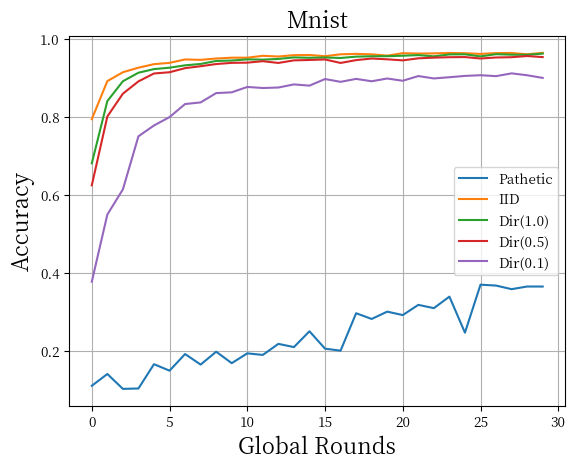

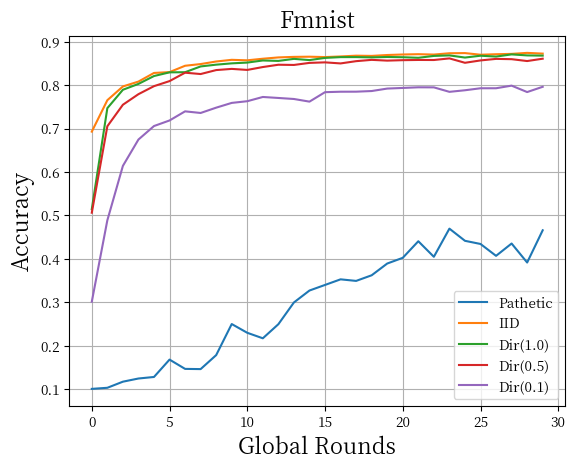

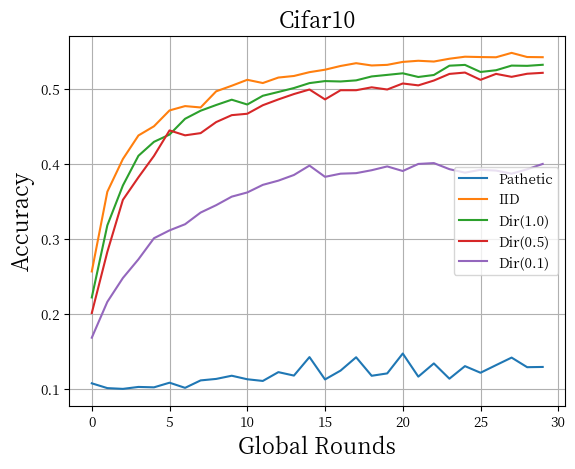

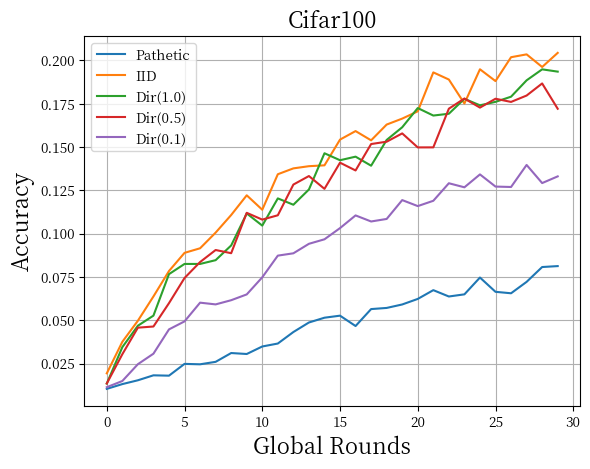

In [1]:
exp = 'dists'
groups = [
    ('2nn', 'mnist'),
    ('cnn', 'fmnist'),
    ('lenet5', 'cifar10'),
    ('resnet9', 'cifar100'),
]

metric = 'acc'
import mplfonts
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
mplfonts.use_font('Noto Serif CJK SC')
cmap = matplotlib.colormaps['tab10']
def path(exp, dataset, model, metric, index):
    return f'results/{exp}-{dataset}-{model}-{exp}/{metric}{index}.csv'

for model, dataset in groups:
    dfs = [pd.read_csv(path(exp, dataset, model, metric, i), index_col=0) for i in range(5)]
    df = pd.concat(dfs, axis=0)
    df = df.rename(columns={
        'global': "Prev",
        'random': "Random",
        'best': "Min",
        'worst': "Max",
        '0.1': 'Dir(0.1)',
        '0.5': 'Dir(0.5)',
        '1.0': 'Dir(1.0)',
        'iid': 'IID',
        'pathetic': 'Pathetic',
    })
    df_mean = df.groupby(level=0).mean()
    for i, column in enumerate(df_mean.columns):
        plt.plot(df_mean.index, df_mean[column], label=column, color=cmap(i))
    plt.grid(True)
    # plt.style.use('default')
    plt.legend()
    plt.title(dataset.capitalize(), fontsize=16)
    plt.xlabel('Global Rounds', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.savefig(f'{exp}-{dataset}-{metric}.svg', bbox_inches='tight')
    plt.show()

In [1]:
exp = 'rates'
dataset = 'cifar100'
model = 'resnet9'
metric = 'time'

In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
cmap = matplotlib.colormaps['tab10']
def path(exp, dataset, model, metric, index):
    return f'results/{exp}-{dataset}-{model}-{exp}/{metric}{index}.csv'

# dfs = [pd.read_csv(path(exp, dataset, model, metric, i), index_col=0).rename(
#     columns={
#     'global': "Prev",
#     'random': "Random",
#     'best': "Min",
#     'worst': "Max",
# }) for i in range(5)]
dfs = [pd.read_csv(path(exp, dataset, model, metric, i), index_col=0) for i in range(5)]
df = pd.concat(dfs, axis=0)
df_maxes = [df.max() for df in dfs]
df_max_concat = pd.concat(df_maxes, axis=1)
df_mean = df_max_concat.mean(axis=1)
# 计算标准差
df_std = df_max_concat.std(axis=1)

# 计算自由度
df_dof = len(dfs) - 1

# 计算置信区间
confidence_level = 0.95
conf_interval = stats.t.interval(confidence_level, df_dof, df_mean, df_std/np.sqrt(len(dfs)))

# 创建两个新的Series来存储置信区间的下限和上限
conf_interval_lower = pd.Series(conf_interval[0], index=df_mean.index)
conf_interval_upper = pd.Series(conf_interval[1], index=df_mean.index)

df_last = pd.DataFrame(columns=['mean', 'err'])

for index in df_mean.index:
    df_last.loc[index] = [df_mean[index], df_mean[index] - conf_interval_lower[index]]

print(df_last)

              mean          err
0.0     936.622991    82.433415
0.1    3534.246420   357.894013
0.25   7223.625788   429.046223
0.5   13393.519730   375.649899
0.8   21227.531604  1085.621708
1.0   25998.465470   422.184532
